# End to End Machine Learning Project

## Questions

## Keywords

## Notes

In this chapter you will work through an example project end to end, pretending to be a recently hired data scientist at a real estate company. Here are the main steps you will go through.

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select o model and train it.
6. Fine-tune your model.
7. Present your solution
8. Launch, monitor, and maintain your system.

### Working With Real Data

When you re learning machine learning. It is best to experiment with real world data, not artificial datasets. Fortunately, there are thousands of open datasets to choose from ranging across all sorts of domains. Here are few places you can look to get data:

Popular open data repositories;

- UC Irvine Machine Learning Repository
- Kaggle datasets
- Amazon's AWS datasets.

Meta portals;

- Data Portals
- OpenDataMonitor
- Quandl

Other pages;

- Wikipedia's list of machine learning datasets
- The datasets subreddit

In this chapter we will be using calivornia housing pricees datasetrs from the statLib repository.

### 1- Look At the Big Picture.

#### Frame the Problem

- The first question to ask your boss is what exactky the business objective is. Building a model is probably not the end goal. How does the company except to use and benefit from this model?

- Your boss answers that your model's output (prediction of a district's median housing price) will be fed to another machine learning system, along with many other *signals*

- A piece of information fed to a machine learning system is often called a signam, in reference to claude shanon's information theory which he developed at bell labs to improve teleacommunications. His theory: you want a high signal-to-noise ratio.

- This downstream system will determine whether it is worth invesing in a given area or not. Getting this right is critical, as it directly affects revenue.

##### Pipelines

A sequence of data processing components is called a data pipeline. Pipelines are very common in ml systems, since there is a lot of data to manipulate and many data transformations to apply.

Compponents typically run asynchronously

Eacg component pulls in a large amount of data, processes it and spits out the result in another **another data store**. Then, some time later, the next component in the pipeline pulls this data and spits out its own output. Each component is fairly self-contained: the interface between components is simply the datastore. This makes yhe system simple to grasp, and different teams can focus on different components. Moreover if a component breaks down, the downstream components can often continue to run normally by just using the last output from the broken component. This makes the architecture quite robust

On the other hand a broken component can go unnoticed for some time if proper monitoring is no timplemented The data gets stale and the overall system;s performance drops.


- After you gathered all the information about the problem you re now ready to start designing your system. First you need to frame the problem: is it supervised, unsupervised or Reinforcement Learning? Is ikt a classification task, a regression task, or something else? Should you use bacth learning or online learning techniques? Before you read on pause and try to answer these questions yourself.

- It is clearly a supervised learning task

- Regression task you re asked to predict a value.

- More specifically, this is a multiple regression problem where yuour system will use multiple features.

- If we were trying to predict multiple values per district. It would be a multivariate regression problem.

- There is no continuoius flow of data coming into the system there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.

- If the data were hugem you could either split your batch learning work acrross multiple servers (using the MapReduce technique) or use an online learning technique.

##### Select a Performamce Measure

- A typical performance measure for regression problems is the root mean square error(RMSE). It gives an idea of how much error the system typically makes in its predictions with a higher weight for large errors.

- A feature vecotr contains all the feature values. (not only one type!)

- Feature matrix is the dataset of the features.

- Eveb though the TMSE is generally the preferred performance measure for regression tasks. some contexts you may prefer to use another function. For example suppose tat there are many outlier districts. In that case, you may consider using the mean absolute error.

- Computing the root of a sum of squares (RMSE) corresponds tot he euclidian norm; this is the notion of distance you are familiar with. It is also called the l2 norm.

- Computing the sum of absolutes corresponds to the l1 norm. This is sometimes called the manhatten norm because it measures the distince between two points in a city if you can only travel along orthogonal city blocks.

- The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE But when outliers are exponentially rare, the RMSE performs very well and is generally preferred.

##### Check The Assumptions.

- Ask your downstream team what are the assumptions and what dype of results they want.

#### Get The Data

- In typical enviroments your data would be available in a relational database (or some ohter common data store) and spread across multible tables/documents/files. To access it you would first need to get your credentials and access authorizations and familiarize yourself with the data schema. In this project however things are much simpler: you will just download a single compressed file. housing.tgz which contains csv file called housing.csv with all the data.

- You could use your web browser toi download the file and 

- Fetch the data;

In [1]:
# Script for fetching the data
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)
    

In [3]:
fetch_housing_data()

In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
import pandas as pd


HOUSING_PATH = os.path.join("datasets", "housing")


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [2]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Dataset contains 20640 instances which is small for a machine learning dataset but, it is good for start.

Also total_bedrooms has 20433 non-null values meaning there are 207 missing values in this dataset, which will be dealed with later.

Object dataype means that it can store any type of python object.

You can check value counts to see if it is categorical.

In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another quick way to get a feel of the type of the data you re dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances either plot this one attribute at time or you can the hist() method on the whole datasetand it willplot a histogram for each numerical attribute.

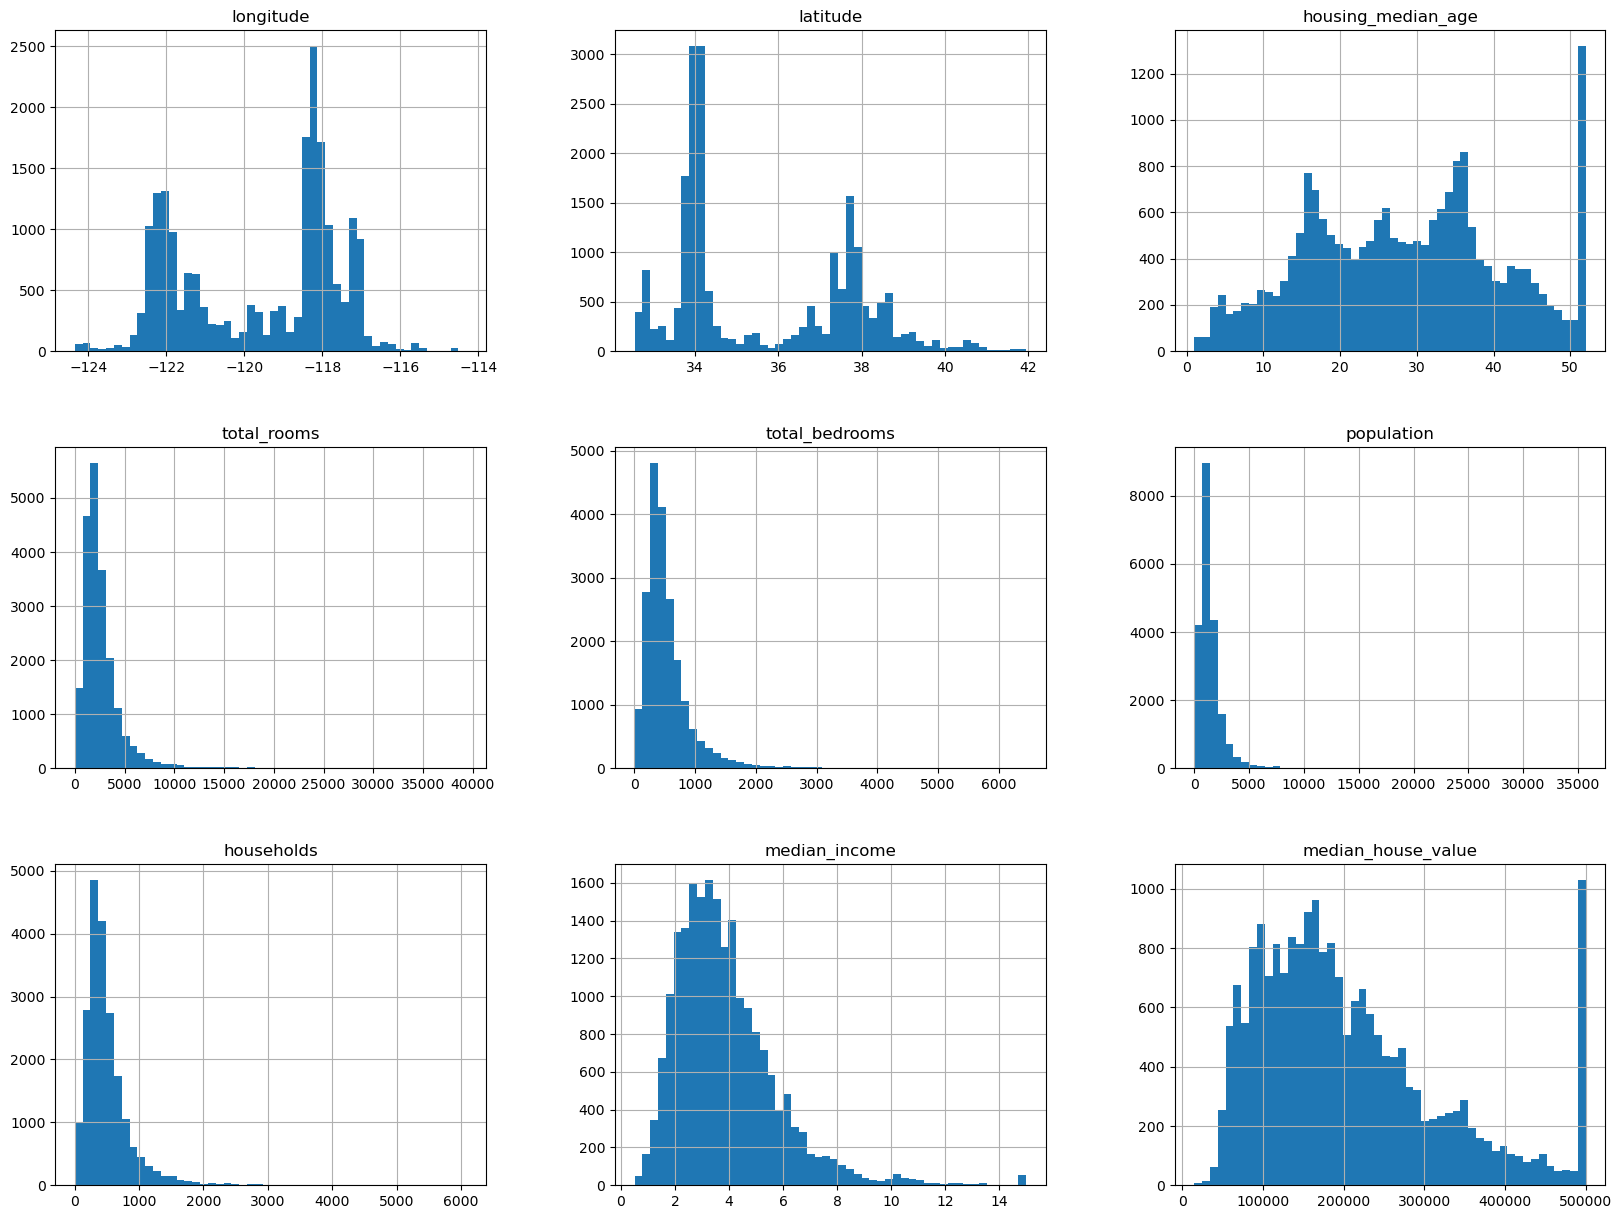

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

There are few things you might notice in these histograms.

1. First the median income attribute does not look like it is Us dollars you re told that the median incomes are scaled. Working with preprocessed data is usual in ml and its not necessaryly a problem.

2. These attributes have very different scales. We will discuss this later in this chapter when we explore feature scaling

4. Finally many histograms are tail-heavy: they extend much farher to the right of the median than to the left. This may make it a bit harder for some machine learning algorithms to detect patterns we will try tranforming these atributes later on to have more bell shaped distributions.

3. The hoising median age and the median house value were also vapped. The latter may be a serious probnlem it is your target attribute.

#### Create a Test Set

- Creating a test set is simple randomly select some portion of the data.

In [7]:
import numpy as np


def split_train_test_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_incides = shuffled_indices[test_set_size:]
    
    return data.iloc[train_incides], data.iloc[test_indices]


train_set, test_set = split_train_test_data(housing, 0.2); train_set.shape, test_set.shape, housing.shape

((16512, 10), (4128, 10), (20640, 10))

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=1337); train_set.shape, test_set.shape, housing.shape

((16512, 10), (4128, 10), (20640, 10))

When a survey campony decides to call 1000 people to ask them a few questions, they don't just pick 1000 people randomly in the phone book. They try to ensure that these 1000 people are representative of the whole population, For examle they try to keep the same male/female proportion. This is called stratified sampling. In stratified sampliong number of insances are sampled from each stratum to guarantee that the test set is representative of the overall population. If the people running the survey used purely representative of the overall population.

<Axes: >

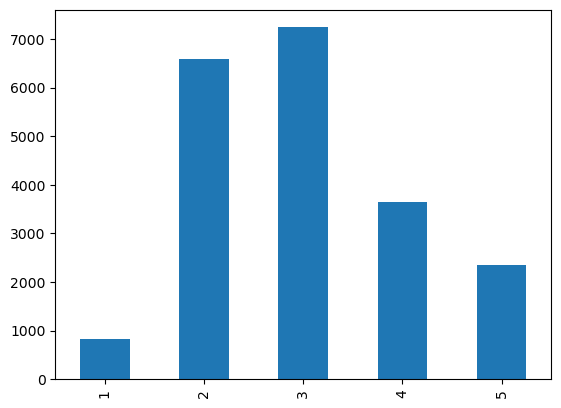

In [9]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6, np.inf],
    labels=[1, 2, 3, 4, 5]
)

housing["income_cat"].value_counts().sort_index().plot.bar()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1337)

for test_index, train_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [11]:
train_set, test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"])

In [12]:
train_set["income_cat"].value_counts() / len(train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

#### Discover and visualize the Data to gain insights.

<Axes: xlabel='longitude', ylabel='latitude'>

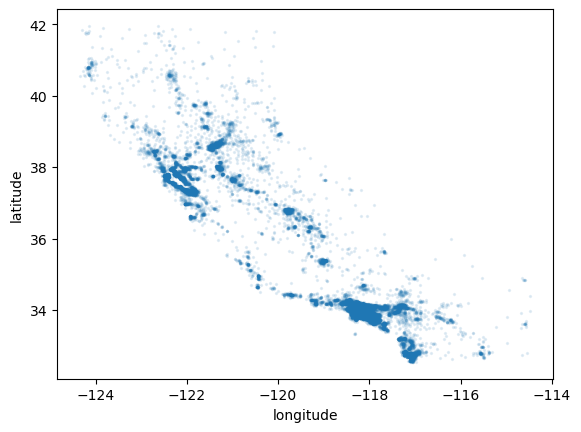

In [13]:
housing = train_set.copy()

housing.plot(kind="scatter", x="longitude", y="latitude", s=2, alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

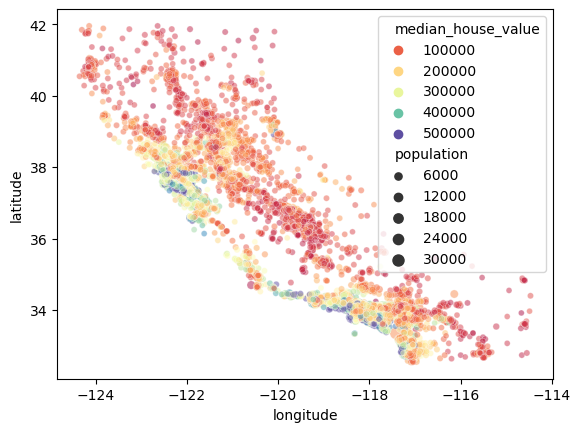

In [16]:
import seaborn as sns



sns.scatterplot(data=housing, 
                x="longitude", 
                y="latitude", 
                alpha=0.5, s=8, 
                hue="median_house_value", 
                palette="Spectral",  
                size="population")

This image tells you that the housing prices are very much related to the location and to the population density.
 
 ##### Looking For Correlations.

C:\Users\ayber\AppData\Local\Temp\ipykernel_20404\1478427477.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing.corr(), cmap="Blues", annot=True, fmt=".2f")


<Axes: >

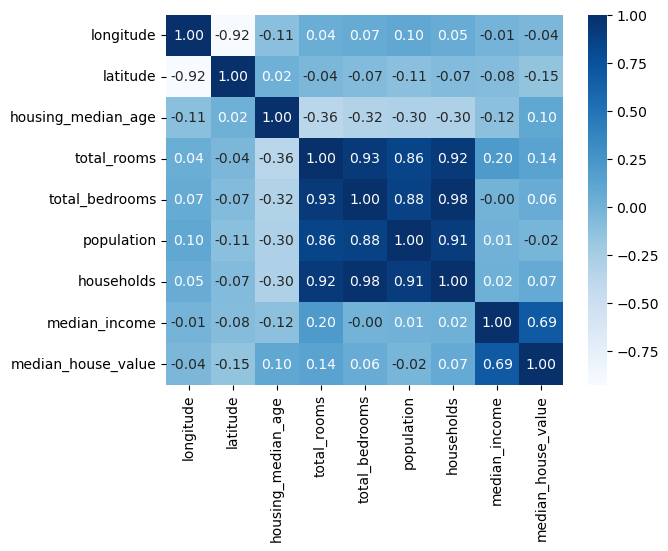

In [22]:
sns.heatmap(housing.corr(), cmap="Blues", annot=True, fmt=".2f")

##### Experimenting With Attribute Combinations.

In [24]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [25]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\ayber\AppData\Local\Temp\ipykernel_20404\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.688934
rooms_per_household         0.145772
total_rooms                 0.141961
housing_median_age          0.099965
households                  0.073490
total_bedrooms              0.057866
population                 -0.018852
population_per_household   -0.023064
longitude                  -0.043112
latitude                   -0.146985
bedrooms_per_room          -0.262490
Name: median_house_value, dtype: float64

Machine learning is go back and forth, later you can come at this stage and analyse again.

##### Data Cleaning

In [26]:
housing = strat_train_set.drop(columns="median_house_value")


In [27]:
housing_labels = strat_train_set["median_house_value"].copy()

3 - Approaches for missing values

1. Get rid of the corresponding na values
2. Get rid of the whole attribute
3. Set the values to some value(zero, the mean, the median)

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)


In [31]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([-118.49  ,   34.25  ,   28.    , 2102.5   ,  435.    , 1168.    ,
        409.5   ,    3.5527,    3.    ])

In [33]:
X = imputer.transform(housing_num)

In [34]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In sklearn learned parameters are accessible via public instance variables with an underscore suffix.

In [37]:
# One hot Encoding

from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[["ocean_proximity"]]

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [39]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

In sklearn you can create a Estimator using the sklearn.base.

###### Feature Scaling

- Machine learning algorithms don't perform well when the input numerical attributes have very different scales.

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

1. Min max, called normalization this converts the data between 0 and 1

2. Standardization has zero mean and resulting distrubition has unit variance.



In [49]:
from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()

imputed_ = ssc.fit_transform(housing_num)

pd.DataFrame(imputed_, columns=housing_num.columns).std(), pd.DataFrame(imputed_, columns=housing_num.columns).std() 

(longitude             1.000121
 latitude              1.000121
 housing_median_age    1.000121
 total_rooms           1.000121
 total_bedrooms        1.000122
 population            1.000121
 households            1.000121
 median_income         1.000121
 income_cat            1.000121
 dtype: float64,
 longitude             1.000121
 latitude              1.000121
 housing_median_age    1.000121
 total_rooms           1.000121
 total_bedrooms        1.000122
 population            1.000121
 households            1.000121
 median_income         1.000121
 income_cat            1.000121
 dtype: float64)

##### Transformation Pipelines

- When you call the pipeline's fit() method it calls fit_transform() sequentially on all transformers passing the output of each call as the parameter to the next call until it reaches the final estimator for which it calls the fit method.

In [51]:
housing_num = train_set.drop(columns=["ocean_proximity"])
housing_cat = train_set[["ocean_proximity"]]



In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()) 
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 1.18517998, -1.0975105 , -1.31972391, ...,  0.08679405,
         0.76935091, -0.00643196],
       [-1.36422438,  0.90416955,  1.29730442, ...,  0.16688235,
         0.52156336, -0.00643196],
       [ 0.93073845, -0.77948657, -1.47833168, ..., -0.010652  ,
        -0.60561008, -0.00643196],
       ...,
       [-1.23949814,  0.7919258 , -0.44738113, ...,  1.65611331,
         2.53766164,  1.89007821],
       [-1.25446529,  0.81998674,  0.58356942, ...,  0.87965772,
         1.31604302,  0.94182312],
       [-1.55879731,  1.31105311,  0.50426553, ..., -0.30478395,
        -0.42713373, -0.00643196]])

In [55]:
from sklearn.compose import ColumnTransformer

num_atrribs = list(housing_num)
cat_attribs = list(housing_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_atrribs),
    ("aybo", OneHotEncoder(), cat_attribs)
]) 

housing_prepared = full_pipeline.fit_transform(train_set)

In [56]:
housing_prepared

array([[ 1.18517998, -1.0975105 , -1.31972391, ...,  0.        ,
         0.        ,  0.        ],
       [-1.36422438,  0.90416955,  1.29730442, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.93073845, -0.77948657, -1.47833168, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.23949814,  0.7919258 , -0.44738113, ...,  0.        ,
         0.        ,  0.        ],
       [-1.25446529,  0.81998674,  0.58356942, ...,  0.        ,
         1.        ,  0.        ],
       [-1.55879731,  1.31105311,  0.50426553, ...,  0.        ,
         0.        ,  0.        ]])